___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# 财务数据项目-解决方案

在此数据项目中，我们将集中进行股票价格的数据分析。该项目仅作为可视化和Pandas的展示

我们将重点关注银行股票，并观察它们如何在整个[金融危机](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308)期间发展。


*注意：Pandas datareader可以直接从互联网上读取股票信息
控制台中输入(pip install pandas-datareader)*

## 获取数据

直接从Google财经中读取数据

### 导包

In [46]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

## 数据

我们需要使用pandas datareader获取数据。我们将获得以下银行的股票信息：
* 美国银行
* 花旗集团
* 高盛
* 摩根大通
* 摩根士丹利
* 富国银行

**弄清楚如何获取这些银行中每个银行从2006年1月1日到2016年1月1日的股票数据。将每个存储体设置为单独的数据框，该存储体的变量名称为其代码符号。这将涉及几个步骤：**

1. 使用datetime设置开始和结束日期时间对象。
2. 找出每个银行的股票代码。
3. 弄清楚如何使用datareader获取股票信息。

**用谷歌浏览器使用[这个页面](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)获得提示和指示（这仅是替换某些值的问题。请使用Google Finance作为来源，例如：**

    
    ＃ 美国银行
    BAC = data.DataReader（“ BAC”，'google'，开始，结束）



In [47]:
import pandas_datareader.data as web
f = web.DataReader('BAC', 'stooq',start='2006-01-01', end='2016-01-01')
#start = datetime.datetime(2006, 1, 1)
#end = datetime.datetime(2016, 1, 1)

In [48]:
# 美国银行
BAC = web.DataReader('BAC', 'stooq',start='2006-01-01', end='2016-01-01')

# 花旗集团
C = web.DataReader('C', 'stooq',start='2006-01-01', end='2016-01-01')

# 高盛
GS = web.DataReader('GS', 'stooq',start='2006-01-01', end='2016-01-01')

# 摩根大通
JPM = web.DataReader('JPM', 'stooq',start='2006-01-01', end='2016-01-01')

# 摩根士丹利
MS = web.DataReader('MS', 'stooq',start='2006-01-01', end='2016-01-01')

# 富国银行
WFC = web.DataReader('WFC', 'stooq',start='2006-01-01', end='2016-01-01')

**按字母顺序创建股票代码的列表（作为字符串）：tickers（股票行情）**

In [49]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**创建一个名为bank_stocks的数据**

In [50]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

**调整列名称**

In [51]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**查看数据头五行**

In [52]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   41.731  41.958  41.044  41.872  18323290.0  440.07  443.45   
2006-01-04   41.801  42.017  41.312  41.428  19966326.0  438.82  440.96   
2006-01-05   41.428  41.650  41.197  41.481  16666543.0  435.02  438.07   
2006-01-06   41.622  41.721  41.225  41.419  14161016.0  438.98  439.15   
2006-01-09   41.552  41.775  41.232  41.446  17561765.0  436.45  437.71   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   432.05  442.67  1712139.0  ...  40.034  40.954  39.727  40.827   
2006-01-04   434.20  434.48  2083320.0  ...  41.106  41.510  40.860  40.860   
2006-01-05   434.66  436.62  1264127.0  ...  40.860  41.028  40.622  40.971   
2006-01-06   432.87  436.62  1525744.0  ...  41.154  41.205  40.649  41.012   
2006-01-09   433.75  434.57  1871527.0  ...  41.051  41.518  41.043  41.441   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6374568.0  23.702  23.986  23.403  23.927  14687538.0  
2006-01-04   9457881.0  23.849  23.864  23.520  23.649  14492354.0  
2006-01-05   6849966.0  23.626  23.664  23.482  23.626  13507351.0  
2006-01-06   8168027.0  23.689  23.829  23.545  23.760  11204308.0  
2006-01-09   4913405.0  23.760  23.864  23.664  23.760   7492296.0  

[5 rows x 30 columns]

# EDA

**在这段时间内，每家银行的股票的最高收盘价是多少？**

In [53]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     48.825
C      506.600
GS     215.190
JPM     61.008
MS      62.530
WFC     49.079
dtype: float64

**创建一个名为return的新的数据框。该数据框将包含每个银行股票的收益，定义如下：**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [54]:
returns = pd.DataFrame()

**我们可以在“收盘价”列上使用pandas pct_change（）方法来创建表示此返回值的列。创建一个for循环，然后在returns中为每个银行股票行情创建此收益列**

In [55]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010604,-0.018501,-0.013590,-0.014228,0.000808,-0.011619
2006-01-05,0.001279,0.004925,-0.000363,0.003051,0.002717,-0.000973
2006-01-06,-0.001495,0.000000,0.013873,0.007064,0.001001,0.005672
2006-01-09,0.000652,-0.004695,0.012162,0.016236,0.010460,0.000000


**使用return数据帧的seaborn创建pairplot*

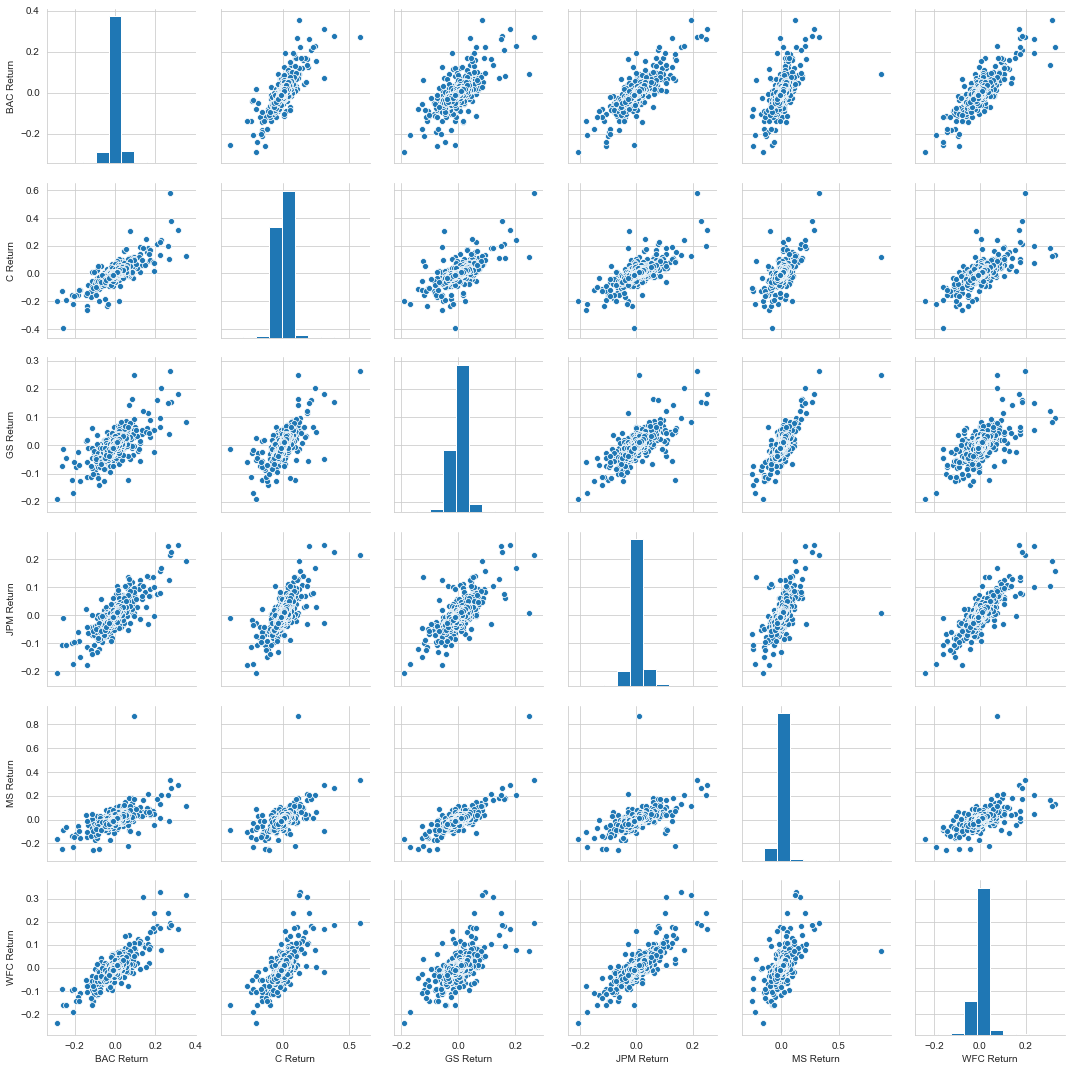

In [56]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

**花旗银行的图像展示出与其他金融机构的不同性**

[花旗集团股票大跌的背景信息，请点击这里](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29)

**使用此收益数据，计算出每只银行股票在哪一天具有最佳和最差的单日收益。注意到有4家银行在同一天共享跌幅最大的股票**

In [57]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**花旗集团的最大跌幅和最大涨幅非常接近，在这段时间内是否发生什么了重大变化**

点击了解[花旗银行股票分割事件](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [58]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**根据收益率的标准差决定在整个时间段内将哪种股票归类为风险最高的股票？您将哪个类别归类为2015年风险最高的类别？**

In [59]:
returns.std() # 花旗银行是最高风险的

BAC Return    0.036604
C Return      0.038616
GS Return     0.025370
JPM Return    0.027668
MS Return     0.037705
WFC Return    0.030220
dtype: float64

In [60]:
returns.ix['2015-01-01':'2015-12-31'].std() # 美国银行和摩根史丹利最危险

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



BAC Return    0.016148
C Return      0.015279
GS Return     0.014027
JPM Return    0.013965
MS Return     0.016009
WFC Return    0.012548
dtype: float64

**摩根士丹利（Morgan Stanley）2015年收益表的分布图**

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



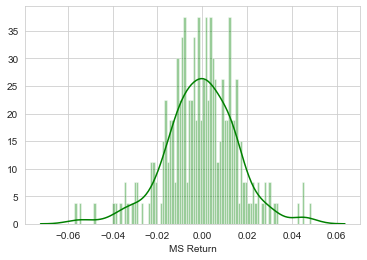

In [61]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

**使用花旗集团（CitiGroup）2008年收益表的S收益表的分布图**

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



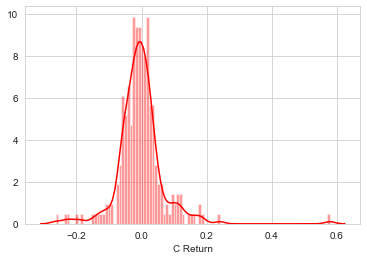

In [62]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

# 其他可视化

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# conda install plotly
import plotly
# conda install -c conda-forge cufflinks-py
import cufflinks as cf
cf.go_offline()

**创建折线图显示整个时间段中每个银行的收盘价**

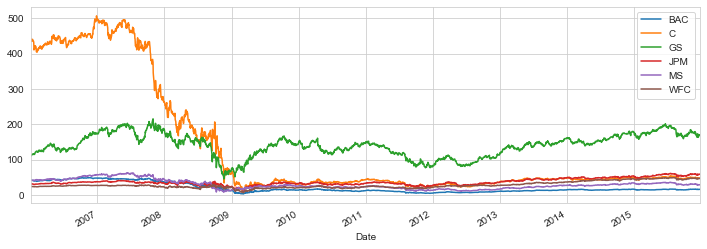

In [64]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

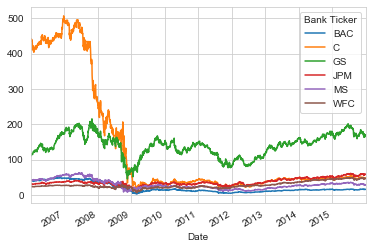

In [65]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [66]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## 移动平均

**从2008年美国银行股票的收盘价，绘制30天移动平均值**

In [67]:
BAC['Close'].loc['2009-01-01':'2008-01-01']

Date
2008-12-31    12.523
2008-12-30    11.778
2008-12-29    11.509
2008-12-26    11.882
2008-12-24    12.034
               ...  
2008-01-08    34.163
2008-01-07    35.487
2008-01-04    35.442
2008-01-03    35.842
2008-01-02    36.072
Name: Close, Length: 253, dtype: float64

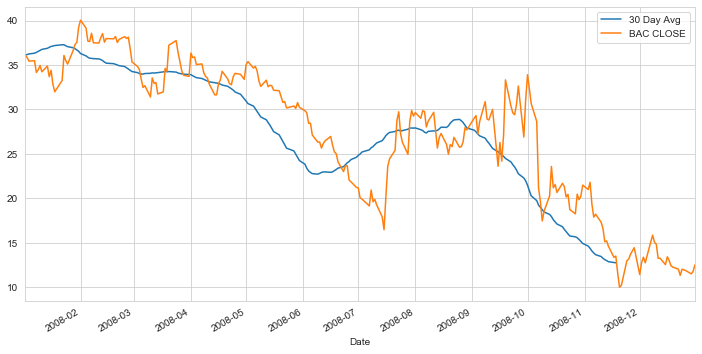

In [68]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2009-01-01':'2008-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2009-01-01':'2008-01-01'].plot(label='BAC CLOSE')
plt.legend()

**创建股票收盘价之间相关性的热图**

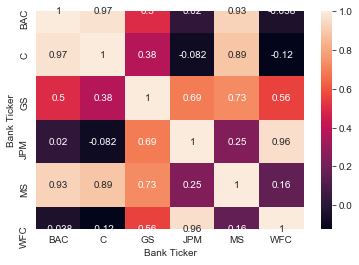

In [69]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

**聚类图**

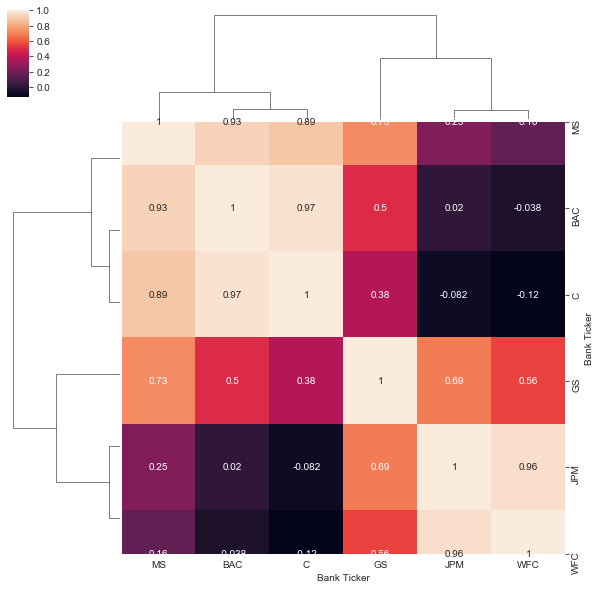

In [70]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [71]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# 技术分析图。

**从2015年1月1日至2016年1月1日，使用.iplot（kind ='candle）创建美国银行股票的蜡烛图。**

In [72]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2016-01-01':'2015-01-01'].iplot(kind='candle')

**使用.ta_plot（study ='sma'）创建摩根士丹利2015年的简单移动平均线图。**

In [73]:
MS['Close'].loc['2016-01-01':'2015-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**使用.ta_plot（study ='boll'）为美国银行创建2015年的Bollinger Band图**

In [74]:
BAC['Close'].loc['2016-01-01':'2015-01-01'].ta_plot(study='boll')

# The end